In this Notebook, we show how the potential due to redistribution of free charge carriers, $V_E$, can be calculated from a surface concentration of defects.

### Setting up the model

First we import Python libraries and define three physical constants.

In [13]:
#Import libraries
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp

In [14]:
#Import code to solve Poisson's equation and plot the resulting potential
from solve_poissons_equation import PoissonEquationBVPsolver, plot_potential

In [15]:
#Physical constants
e = 1.6e-19 #Elementary charge
kBev = 8.6173325e-5 #Boltzmann constant
epsilon_0 = 8.854187817e-12 #Vacuum permittivity

Below we define material dependent constants. Note that the proton concentration is set to zero due to the high vacuum conditions in the TEM column.

In [16]:
#Material dependent constants
epsilon_r = 75 #Dielectric constant
T = 300 #Temperature
c_acc = 0.1 #Acceptor doping concentration
c_v_bulk = c_acc/2 #Oxygen vacancy concentration
c_oh_bulk = 0 #Proton concentration
lattice_parameter = 4.2e-10
unit_cell_volume = lattice_parameter**3
c_acc_per_m3 = c_acc/unit_cell_volume

We also set numerical parameters for the modelling. 'phi_core' is the first initial guess of the potential at the GB interface ($V_E(0)$), and 'phi_core_iterator' is the incremental change in $V_E(0)$ for each iteration.

$V_E(0)$ is changed until convergence is obtained with charge neutrality. Choosing a low value for 
'phi_core_iterator' will increase the accuracy, but also the time needed to reach convergence.

In [17]:
#Numerical parameters
phi_core = 0.01
phi_core_iterator = 0.001

### Barium vacancies

Now we are ready to calculate and plot the potential, starting with barium vacancies.

The surface concentrations are calculated by

i) Summing the barium vacancy concentrations in all atomic planes in the GB core, per formula unit

ii) Projecting the entire vacancy concentration from (i) into the GB interface plane, and assuming a (100) surface with area (4.2e-10)^2 per formula unit

In [18]:
c_barium_vacancies_per_area = 6.12e18
core_charge = -2*e*c_barium_vacancies_per_area

poisson_obj_v_ba = PoissonEquationBVPsolver(epsilon_r, c_v_bulk, c_oh_bulk, c_acc, T, unit_cell_volume, phi_core, core_charge, phi_core_iterator)

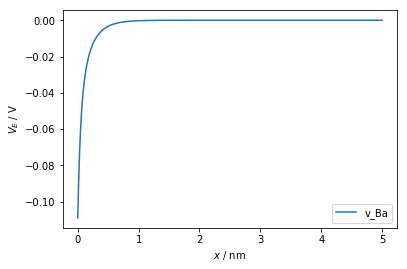

In [19]:
plot_potential(poisson_obj_v_ba, "v_Ba")
plt.show()

### Yttrium on the zirconium site

Let us do the similar exercise with yttrium on the zirconium site

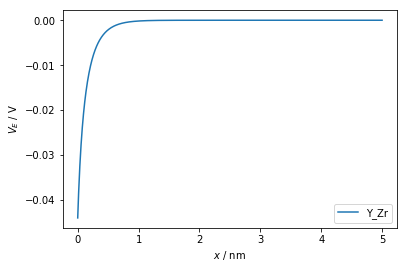

In [20]:
excess_yttrium_doping_per_area = 3.41e18
core_charge = -e*excess_yttrium_doping_per_area

poisson_obj_y_zr = PoissonEquationBVPsolver(epsilon_r, c_v_bulk, c_oh_bulk, c_acc, T, unit_cell_volume, phi_core, core_charge, phi_core_iterator)

plot_potential(poisson_obj_y_zr, "Y_Zr")
plt.show()

### Yttrium on the barium site

And similarly, with yttrium on the barium site

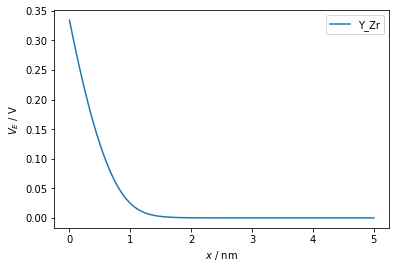

In [21]:
excess_yttrium_doping_per_area = 3.41e18
core_charge = e*excess_yttrium_doping_per_area

poisson_obj_y_ba = PoissonEquationBVPsolver(epsilon_r, c_v_bulk, c_oh_bulk, c_acc, T, unit_cell_volume, phi_core, core_charge, phi_core_iterator)

plot_potential(poisson_obj_y_ba, "Y_Zr")
plt.show()

### Comparison between defects

Finally, let us compare the three defects in the same plot.

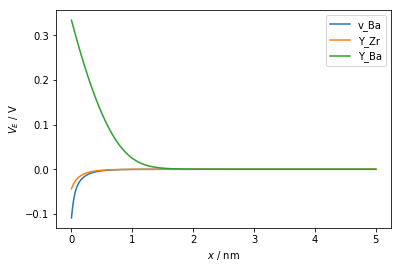

In [22]:
plot_potential(poisson_obj_v_ba, "v_Ba")
plot_potential(poisson_obj_y_zr, "Y_Zr")
plot_potential(poisson_obj_y_ba, "Y_Ba")
plt.show()